## H2 VQE using a user-defined Hamiltonion

This notebook feautures a VQE trial that uses a user-defined Hamiltonian, namely, the hamiltonian used in Yamamoto (2019) in the 2-qubit example. We examine the performance of the quantum natural gradient compared to the the vanilla gradient descent optimizer for this small VQE problem.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

import pennylane as qml
from pennylane import Hamiltonian, VQECost

import sys
sys.path.append('../')
from run_vqe import *

In [2]:
dev = qml.device("default.qubit", wires=2)

#create ansatz 
def ansatz(params, wires):
    qml.BasisState(np.array([1, 0]), wires=wires)
    
    #parameterized layer 0
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    
    #entanglement
    qml.CNOT(wires=[0,1])
    
    #param layer 1
    qml.RY(params[2], wires=0)
    qml.RY(params[3], wires=1)


In [3]:
alpha = 0.4
beta = 0.2
coeffs = [alpha, alpha, beta]

#H2 hamiltonian from Yamamoto 2019
obs_list = [
    qml.PauliZ(0) @ qml.Identity(1),
    qml.Identity(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1)
]

#create qnodes
ham = qml.Hamiltonian(coeffs, obs_list)

#create cost function
cost = VQECost(ansatz, ham, dev)

init_params = np.array([-0.2,-0.2,0,0])
max_iter = 200
step_size = 0.05

In [4]:
print("QNG RUN")
qng_run, qng_n_steps = run_vqe(cost_fn=cost, 
                               max_iter=max_iter, 
                               initial_params=init_params, 
                               opt_name='QNGOptimizer', 
                               step_size=step_size, 
                               diag_approx=False)


print("VANILLA RUN")
vanilla_run, vanilla_n_steps = run_vqe(cost_fn=cost, 
                               max_iter=max_iter, 
                               initial_params=init_params, 
                               opt_name='GradientDescentOptimizer', 
                               step_size=step_size)

QNG RUN
Iteration = 0,  Ground-state energy = -0.76268501 Ha,  Convergence parameter = 0.02618004 Ha
Iteration = 20,  Ground-state energy = -0.82444782 Ha,  Convergence parameter = 0.00004115 Ha
Iteration = 40,  Ground-state energy = -0.82461577 Ha,  Convergence parameter = 0.00000094 Ha
VANILLA RUN
Iteration = 0,  Ground-state energy = -0.74338143 Ha,  Convergence parameter = 0.00687646 Ha
Iteration = 20,  Ground-state energy = -0.80872512 Ha,  Convergence parameter = 0.00133575 Ha
Iteration = 40,  Ground-state energy = -0.82127028 Ha,  Convergence parameter = 0.00025922 Ha
Iteration = 60,  Ground-state energy = -0.82378251 Ha,  Convergence parameter = 0.00005537 Ha
Iteration = 80,  Ground-state energy = -0.82435602 Ha,  Convergence parameter = 0.00001416 Ha
Iteration = 100,  Ground-state energy = -0.82451772 Ha,  Convergence parameter = 0.00000458 Ha
Iteration = 120,  Ground-state energy = -0.82457521 Ha,  Convergence parameter = 0.00000181 Ha


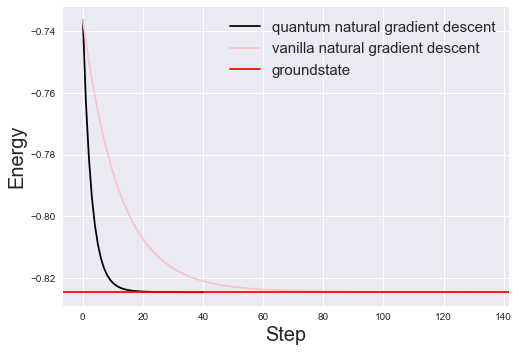

In [19]:
plt.style.use("seaborn")
ax = plt.axes()
plt.plot(qng_run, "black", label="quantum natural gradient descent")
plt.plot(vanilla_run, "pink", label="vanilla natural gradient descent")

plt.ylabel("Energy", fontsize=20)
plt.xlabel("Step", fontsize=20)

ax.axhline(y=-0.8246211251235321, label='groundstate', color='r')
plt.legend(fontsize=15)
plt.show()

In [ ]:
qubit_op = (openfermion.QubitOperator('Z0', 0.4) + openfermion.QubitOperator('Z1', 0.4) + openfermion.QubitOperator('X0 X1', 0.2))

# create open fermion qubit op so that we can get the groundstate to compare our final energies

#create linear op that is compatible with get_ground_state
lin_op = openfermion.utils.LinearQubitOperator(qubit_op)

#fetch the exact ground state
ground_state, eig_vals = openfermion.utils.get_ground_state(lin_op)
print(ground_state)